In [22]:
def inputForLagrange():
    
    params = input('Список переменных через пробел : ')
    params = params.split(' ')
    if len(params) > 2:
        print('Введено более двух переменных')
    elif len(params) < 2 :
        print('Введено менее двух переменных')
    F = input('Функция в аналитическом виде :  ')
    L = input('Есть ли ограничения, 1 - да; 0 нет : ')
    if L == '1':
        lim1 = input(f'Ограничения для {params[0]} через пробел :  ')
        lim2 = input(f'Ограничения для {params[1]} через пробел :  ')
    elif L =='0':
        lim1 = ('999')
        lim2 = ('999')
    else :
        print('Ошибка ввода наличия ограничений')
    lim1 = list(map(float, (lim1.split(' '))))
    lim2 = list(map(float, (lim2.split(' '))))

    Z = input('Ограничивающая функция :  ')
    Final = {'p1': params[0],
             'p2': params[1],
             'func': F,
             'lims1': lim1,
             'lims2': lim2,
             'Z' : Z}
    return Final


from sympy import *

def Lagrange(dictionary):
    import numpy as np
    # преобразование данных для символьного вычислнения
    from sympy.parsing.sympy_parser import parse_expr

    data = dictionary
    func = data['func'] + ' + l *' + '(' + data['Z'] + ')'
    func = parse_expr(func)
    z = parse_expr(data['func'])
    p1 = data['p1']
    x = Symbol(p1)
    p2 = data['p2']
    y = Symbol(p2)
    l = Symbol('l')
    lim1 = data['lims1']
    lim2 = data['lims2']
    ## реализация метода
    
    dx = func.diff(p1)
    dy = func.diff(p2)
    dl = func.diff(l)
    points = solve((dx,dy,dl), [x,y,l],dict = True)
    
    M = Matrix([[0, z.diff(x), z.diff(y)],
                [z.diff(x), func.diff(x,2),func.diff(x,y)],
                [z.diff(y) , func.diff(x,y), func.diff(y,2)]])
    determinant = M.det()
    
    G = Matrix([[func.diff(x,2), func.diff(x,y)],
                [func.diff(x,y), func.diff(y,2)]])

    for i in points :
        if len(lim1) == len(lim2) == 2 :

            if (float(i[x]) >= lim1[0] and float(i[x]) <= lim1[1]) and (float(i[y]) >= lim2[0] and float(i[y]) <= lim2[1]):

                if determinant.subs(x,i[x]).subs(y,i[y]).subs(l,i[l]) > 0:
                    i['тип'] ='условный максимум'
                    i['Func'] = func.subs(x,i[x]).subs(y,i[y]).subs(l,i[l])
                    print(i)
            
                elif determinant.subs(x,i[x]).subs(y,i[y]).subs(l,i[l]) < 0:
                    i['тип'] ='условный минимум'
                    i['Func'] = func.subs(x,i[x]).subs(y,i[y]).subs(l,i[l])
                    print(i)
    
                elif (((func.diff(x,2).subs(x,i[x]).subs(y,i[y]).subs(l,i[l]) > 0) * (G.det().subs(x,i[x]).subs(y,i[y]).subs(l,i[l]) > 0)) == 0 or
                ((func.diff(x,2).subs(x,i[x]).subs(y,i[y]).subs(l,i[l]) < 0) * (G.det().subs(x,i[x]).subs(y,i[y]).subs(l,i[l]) > 0))) == 0:
                    i['тип'] ='седловая точка'
                    i['Func'] = func.subs(x,i[x]).subs(y,i[y]).subs(l,i[l])
                    print(i)

                else:
                    i['тип'] = 'требуется дополнительное исследование'
                    i['Func'] = func.subs(x,i[x]).subs(y,i[y]).subs(l,i[l])
                    print(i)    
    else :
        if determinant.subs(x,i[x]).subs(y,i[y]).subs(l,i[l]) > 0:

            i['тип'] ='условный максимум'
            i['Func'] = func.subs(x,i[x]).subs(y,i[y]).subs(l,i[l])
            print(i)

        elif determinant.subs(x,i[x]).subs(y,i[y]).subs(l,i[l]) < 0:
            i['тип'] ='условный минимум'
            i['Func'] = func.subs(x,i[x]).subs(y,i[y]).subs(l,i[l])
            print(i)
    
        elif (((func.diff(x,2).subs(x,i[x]).subs(y,i[y]).subs(l,i[l]) > 0) * (G.det().subs(x,i[x]).subs(y,i[y]).subs(l,i[l]) > 0)) == 0 or
        ((func.diff(x,2).subs(x,i[x]).subs(y,i[y]).subs(l,i[l]) < 0) * (G.det().subs(x,i[x]).subs(y,i[y]).subs(l,i[l]) > 0))) == 0:
            i['тип'] ='седловая точка'
            i['Func'] = func.subs(x,i[x]).subs(y,i[y]).subs(l,i[l])
            print(i)

        else:
            i['тип'] = 'требуется дополнительное исследование'
            i['Func'] = func.subs(x,i[x]).subs(y,i[y]).subs(l,i[l])
            print(i)   

            
    if len(lim1) == 2 :
        xx = np.linspace(lim1[0] - 5, lim1[1] + 5, 1000)
        yy = np.linspace(lim2[0] - 5, lim2[1] + 5, 1000)
    else:
        xx = np.linspace(-20, 20, 1000)
        yy = np.linspace(-20, 20, 1000)
    
    f = lambdify([x,y], z)
  

    coord_x_p = np.array([float(i[x]) for i in points if 'тип' in i]) 
    coord_y_p = np.array([float(i[y]) for i in points if 'тип' in i])
    coord_z_p = f(coord_x_p, coord_y_p)
    M = input('Масштабируем график, 1-да , 0- нет :')
    if M=='1':
        limx1=(float(sum(coord_x_p)/len(coord_x_p))+max(coord_x_p))
        limx2=(float(sum(coord_x_p)/len(coord_x_p))-max(coord_x_p))
        limy1=(float(sum(coord_y_p)/len(coord_y_p))+max(coord_y_p))
        limy2=(float(sum(coord_y_p)/len(coord_y_p))-max(coord_y_p))
        xx = np.linspace(limx2, limx1, 1000)
        yy = np.linspace(limy2, limx1 , 1000)
        
    elif M =='0':
        limx1 = ('999')
        limx2 = ('999')
        limy1 = ('999')
        limy2 = ('999')
        
    else :
        return 'Ошибка ввода наличия ограничений'
    
    X, Y = np.meshgrid(xx, yy)

    
    Z = f(X,Y)
        

    
    return {'x' : x, # переменная 1
            'y' : y, # переменная 2
            'z': z, # начальная функция
            'func' : func, # функция с лямбдой
            'x_p' : coord_x_p, # координаты точек экстремумов по 1 пер (после ограничений)
            'y_p' : coord_y_p, # координаты точек экстремумов по 2 пер (после ограничений)
            'z_p' : coord_z_p, # значения функции в экстремумах,
            'X' : X,
            'Y' : Y,
            'Z' : Z,
           'limx1' : limx1,
           'limx2' : limx2,
           'limy1' : limy1,
           'limy2' : limy2
           }

def graph(d):

    #%matplotlib notebook
    from matplotlib import cm
    from matplotlib.ticker import LinearLocator
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt
    
    plt.rcParams['figure.figsize'] = (8,6)
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    

    surf = ax.plot_surface(d['X'], d['Y'], d['Z'], cmap='Purples',
                           alpha=0.5,linewidth=1, antialiased=False)
    
    ax.scatter3D(d['x_p'], d['y_p'], d['z_p'],color='yellow', s=50, alpha=1)

    ax.set_xlabel(f"{d['x']}")
    ax.set_ylabel(f"{d['y']}")
    ax.set_zlabel(f"{d['z']}")
    plt.show()

def graph_lines(d):
    import matplotlib.pyplot as plt
    
    plt.rcParams['figure.figsize'] = (6,6)
    fig, ax = plt.subplots()
    
    ax.contour(d['Z'])
    ax.clabel(ax.contour(d['Z']))
    
    ax.set_title(f'Линии уровня функции {d["z"]}')
    plt.show()

Список переменных через пробел : x y
Функция в аналитическом виде :  x*y
Есть ли ограничения, 1 - да; 0 нет : 1
Ограничения для x через пробел :  -10 10
Ограничения для y через пробел :  -1 1
Ограничивающая функция :  x**2+4*y**2-1
{x: -sqrt(2)/2, y: -sqrt(2)/4, l: -1/4, 'тип': 'условный максимум', 'Func': 1/4}
{x: sqrt(2)/2, y: sqrt(2)/4, l: -1/4, 'тип': 'условный максимум', 'Func': 1/4}
{x: -sqrt(2)/2, y: sqrt(2)/4, l: 1/4, 'тип': 'условный минимум', 'Func': -1/4}
{x: sqrt(2)/2, y: -sqrt(2)/4, l: 1/4, 'тип': 'условный минимум', 'Func': -1/4}
{x: sqrt(2)/2, y: -sqrt(2)/4, l: 1/4, 'тип': 'условный минимум', 'Func': -1/4}
Масштабируем график, 1-да , 0- нет :1


<IPython.core.display.Javascript object>


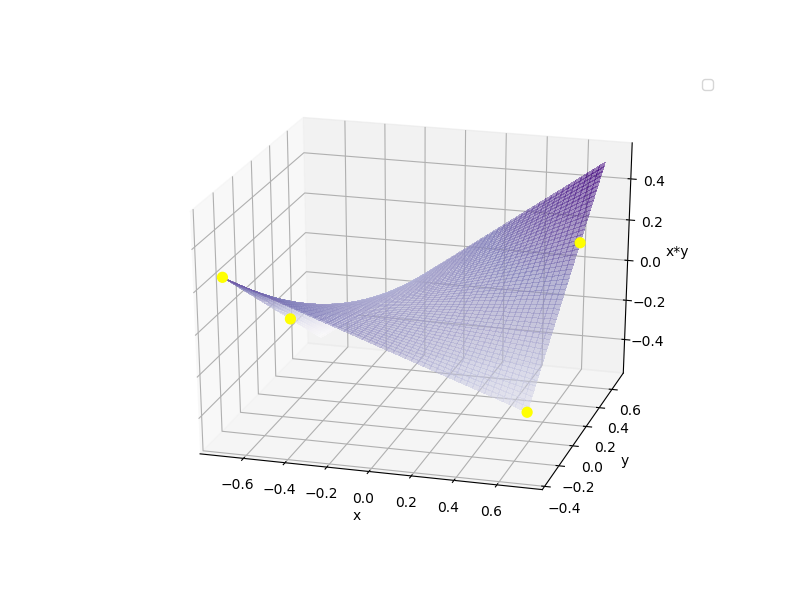

In [23]:
graph(Lagrange(inputForLagrange()))

In [ ]:
# #что касается наших ошибок :
# 1- точки максимума и минимума разными цветами , и изменить цветовую палитру ( чтобы было видно все точки, мягкие цвета графика и яркие для точек)
# 2- к графикам прикрепить легенду
# 3-создать параметр по масштабированию графиков( тоже самое "есть ли ограничение 1 - да , 0 нет ") : формула : среднее по иксов первое значение : среднее-abs(max(x)) второе значение : среднее+abs(max(x))
# 4- при построении графиков рисовать ограничивающую функцию
# 5- графики выводятся в одно место